In [2]:
%load_ext lab_black

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from math import log

In [40]:
#####
# Load and Explore the Data
#####
cleaned_data_df = pd.read_csv("../00_data/Cleaned_Data_22MAR.gz", compression="gzip")
hr_merged_df = pd.read_csv("../00_data/data3.0.csv")

In [41]:
hr_merged_df.rename(
    columns={"searchedDate": "Time"},
    inplace=True,
)

In [57]:
hr_merged_df.columns

Index(['Unnamed: 0', 'viewCount', 'likeCount', 'dislikeCount',
       'num_days_since_pub', 'viewcounts_weighted', 'like_count_weighted',
       'dislike_count_weighted', 'like_dislike_ratio',
       'weighted_like_dislike_ratio',
       'like_dislike_ratio_by_viewcounts_weighted',
       'videoTitleSentimentScore_vader_pos',
       'videoTitleSentimentScore_vader_neg',
       'videoTitleSentimentScore_vader_com', 'captionSentimentScore_vader_pos',
       'captionSentimentScore_vader_neg', 'captionSentimentScore_vader_com',
       'caption_list_split_by_nvidia_10words_flairscores',
       'caption_list_split_by_nvidia_20words_flairscores',
       'caption_list_split_by_nvidia_35words_flairscores',
       'caption_list_split_by_nvidia_10words_vaderscores',
       'caption_list_split_by_nvidia_20words_vaderscores',
       'caption_list_split_by_nvidia_35words_vaderscores', 'Time', 'weekday',
       'price', 'percent_change_24', 'percent_change_48', 'percent_change_72',
       'percent_ch

In [27]:
cleaned_data_df[cleaned_data_df["VideoTitle"].isna()]["videoID"].nunique()

0

In [28]:
cleaned_data_df["videoID"].nunique()

450

In [29]:
cleaned_data_df

,Unnamed: 0,Index,videoID,datePub,searchedDate,VideoTitle,channelTitle,viewCount,likeCount,dislikeCount,captionString
0,0,0,y4fb_R5Ogw0,2020-10-01 05:16:02+00:00,2020-10-02 01:45:21.553469+00:00,"2x NVIDIA RTX 3090 SLI Benchmarks: 500FPS, 700...",Gamers Nexus,367472,15701,260,so this setup that you're seeing is what we ha...
1,1,1,ALEXVtnNEwA,2020-09-01 17:15:57+00:00,2020-10-02 01:45:22.351801+00:00,NVIDIA GeForce Special Event Livestream,IGN,543115,16860,411,b welcome to my kitchen i hope all of you are ...
2,2,2,E98hC9e__Xs,2020-09-01 16:42:07+00:00,2020-10-02 01:45:23.252012+00:00,NVIDIA GeForce RTX 30 Series | Official Launch...,NVIDIA GeForce,1484075,54741,1135,Welcome to my kitchen. I hope all of you are...
3,3,3,nMns8t4OhI0,2020-09-30 23:00:06+00:00,2020-10-02 01:45:23.922084+00:00,NVIDIA Responds to RTX 3080 Crashes...,JayzTwoCents,561238,27766,885,NaN
4,4,4,AG_ZHi3tuyk,2020-09-16 12:59:59+00:00,2020-10-02 01:45:24.592244+00:00,"Nvidia, you PROMISED! - RTX 3080 Review",Linus Tech Tips,3391565,141852,3961,- The RTX 3080 is the most powerful GPU we've ...
...,...,...,...,...,...,...,...,...,...,...,...
20788,20788,20,AG_ZHi3tuyk,2020-09-16 12:59:59+00:00,2021-03-19 18:03:20.670031+00:00,"Nvidia, you PROMISED! - RTX 3080 Review",Linus Tech Tips,3741789,148430,4216,- The RTX 3080 is the most powerful GPU we've ...
20789,20789,21,3dJhDqLjPN0,2021-02-24 21:59:34+00:00,2021-03-19 18:03:21.320922+00:00,NVIDIA (NVDA) Stock Analysis - Q4 Earnings + I...,The Investor Channel,7773,269,1,what is going on investors hopefully guys had ...
20790,20790,22,H1DApIvOCMw,2021-02-26 17:35:37+00:00,2021-03-19 18:03:21.788746+00:00,My SALTY Review of the NVIDIA RTX 3060...,JayzTwoCents,1013948,51773,702,with no parts markup and only a 75 build fee r...
20791,20791,23,Y5J2bgXiK9g,2021-03-09 17:00:10+00:00,2021-03-19 18:03:22.387116+00:00,Should Nvidia Stop Selling 3060s?,LMG Clips,53940,2238,33,uh the you know the 30 80 eth mining wait isn'...


In [45]:
hr_merged_df.columns

Index(['Unnamed: 0', 'viewCount', 'likeCount', 'dislikeCount',
       'num_days_since_pub', 'viewcounts_weighted', 'like_count_weighted',
       'dislike_count_weighted', 'like_dislike_ratio',
       'weighted_like_dislike_ratio',
       'like_dislike_ratio_by_viewcounts_weighted',
       'videoTitleSentimentScore_vader_pos',
       'videoTitleSentimentScore_vader_neg',
       'videoTitleSentimentScore_vader_com', 'captionSentimentScore_vader_pos',
       'captionSentimentScore_vader_neg', 'captionSentimentScore_vader_com',
       'caption_list_split_by_nvidia_10words_flairscores',
       'caption_list_split_by_nvidia_20words_flairscores',
       'caption_list_split_by_nvidia_35words_flairscores',
       'caption_list_split_by_nvidia_10words_vaderscores',
       'caption_list_split_by_nvidia_20words_vaderscores',
       'caption_list_split_by_nvidia_35words_vaderscores', 'Time', 'weekday',
       'price', 'percent_change_24', 'percent_change_48', 'percent_change_72',
       'percent_ch

In [46]:
#####
# Normalize the data
#####

from sklearn import preprocessing

columns = hr_merged_df.columns

# #Print columns to refernce for normlization
# for i in range(len(columns)):
#     print(columns[i])
#     pass

column_names_to_normalize = [
    "viewCount",
    "likeCount",
    "dislikeCount",
    "num_days_since_pub",
    "viewcounts_weighted",
    "like_count_weighted",
    "dislike_count_weighted",
    "like_dislike_ratio",
    "weighted_like_dislike_ratio",
    "like_dislike_ratio_by_viewcounts_weighted",
    "videoTitleSentimentScore_vader_pos",
    "videoTitleSentimentScore_vader_neg",
    "videoTitleSentimentScore_vader_com",
    "captionSentimentScore_vader_pos",
    "captionSentimentScore_vader_neg",
    "captionSentimentScore_vader_com",
    "caption_list_split_by_nvidia_10words_flairscores",
    "caption_list_split_by_nvidia_20words_flairscores",
    "caption_list_split_by_nvidia_35words_flairscores",
    "caption_list_split_by_nvidia_10words_vaderscores",
    "caption_list_split_by_nvidia_20words_vaderscores",
    "caption_list_split_by_nvidia_35words_vaderscores",
]

hr_merged_df_normal = hr_merged_df.copy()

# scaler = preprocessing.StandardScaler().fit(X_train_ohe[column_names_to_normalize])
# X_train_ohe[column_names_to_normalize] = scaler.fit_transform(
#     X_train_ohe[column_names_to_normalize]
# )
# X_test_ohe[column_names_to_normalize] = scaler.fit_transform(
#     X_test_ohe[column_names_to_normalize]
# )

min_max_scaler = preprocessing.MinMaxScaler().fit(
    hr_merged_df_normal[column_names_to_normalize]
)

hr_merged_df_normal[column_names_to_normalize] = min_max_scaler.fit_transform(
    hr_merged_df_normal[column_names_to_normalize]
)

In [47]:
hr_merged_df_normal["Time"] = pd.to_datetime(
    hr_merged_df_normal["Time"], format="%Y-%m-%d %H:%M", utc=True
).dt.date

In [48]:
hr_merged_df_normal["product_videosent"] = (
    hr_merged_df_normal["videoTitleSentimentScore_vader_pos"]
    * hr_merged_df_normal["videoTitleSentimentScore_vader_neg"]
)

In [49]:
hr_merged_df_normal.head()

,Unnamed: 0,viewCount,likeCount,dislikeCount,num_days_since_pub,viewcounts_weighted,like_count_weighted,dislike_count_weighted,like_dislike_ratio,weighted_like_dislike_ratio,...,caption_list_split_by_nvidia_20words_vaderscores,caption_list_split_by_nvidia_35words_vaderscores,Time,weekday,price,percent_change_24,percent_change_48,percent_change_72,percent_change_96,product_videosent
0,0,1.000000,1.000000,1.000000,0.103116,0.680324,0.517210,0.764437,0.924363,0.924363,...,0.000000,0.210464,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.247190
1,1,0.549737,0.578787,0.594001,0.092890,0.417243,0.325562,0.496561,0.838936,0.838936,...,0.049330,0.115768,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.144169
2,2,0.595948,0.634468,0.661524,0.109137,0.315061,0.259327,0.457250,0.781887,0.781887,...,0.212499,0.229164,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.306448
3,3,0.614283,0.660345,0.690521,0.118471,0.319809,0.262472,0.464198,0.714035,0.714035,...,0.160854,0.164435,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.298044
4,4,0.614614,0.660834,0.691078,0.118772,0.321493,0.264972,0.467953,0.783524,0.783524,...,0.186676,0.152927,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.360829


In [50]:
corr = hr_merged_df_normal.corr()

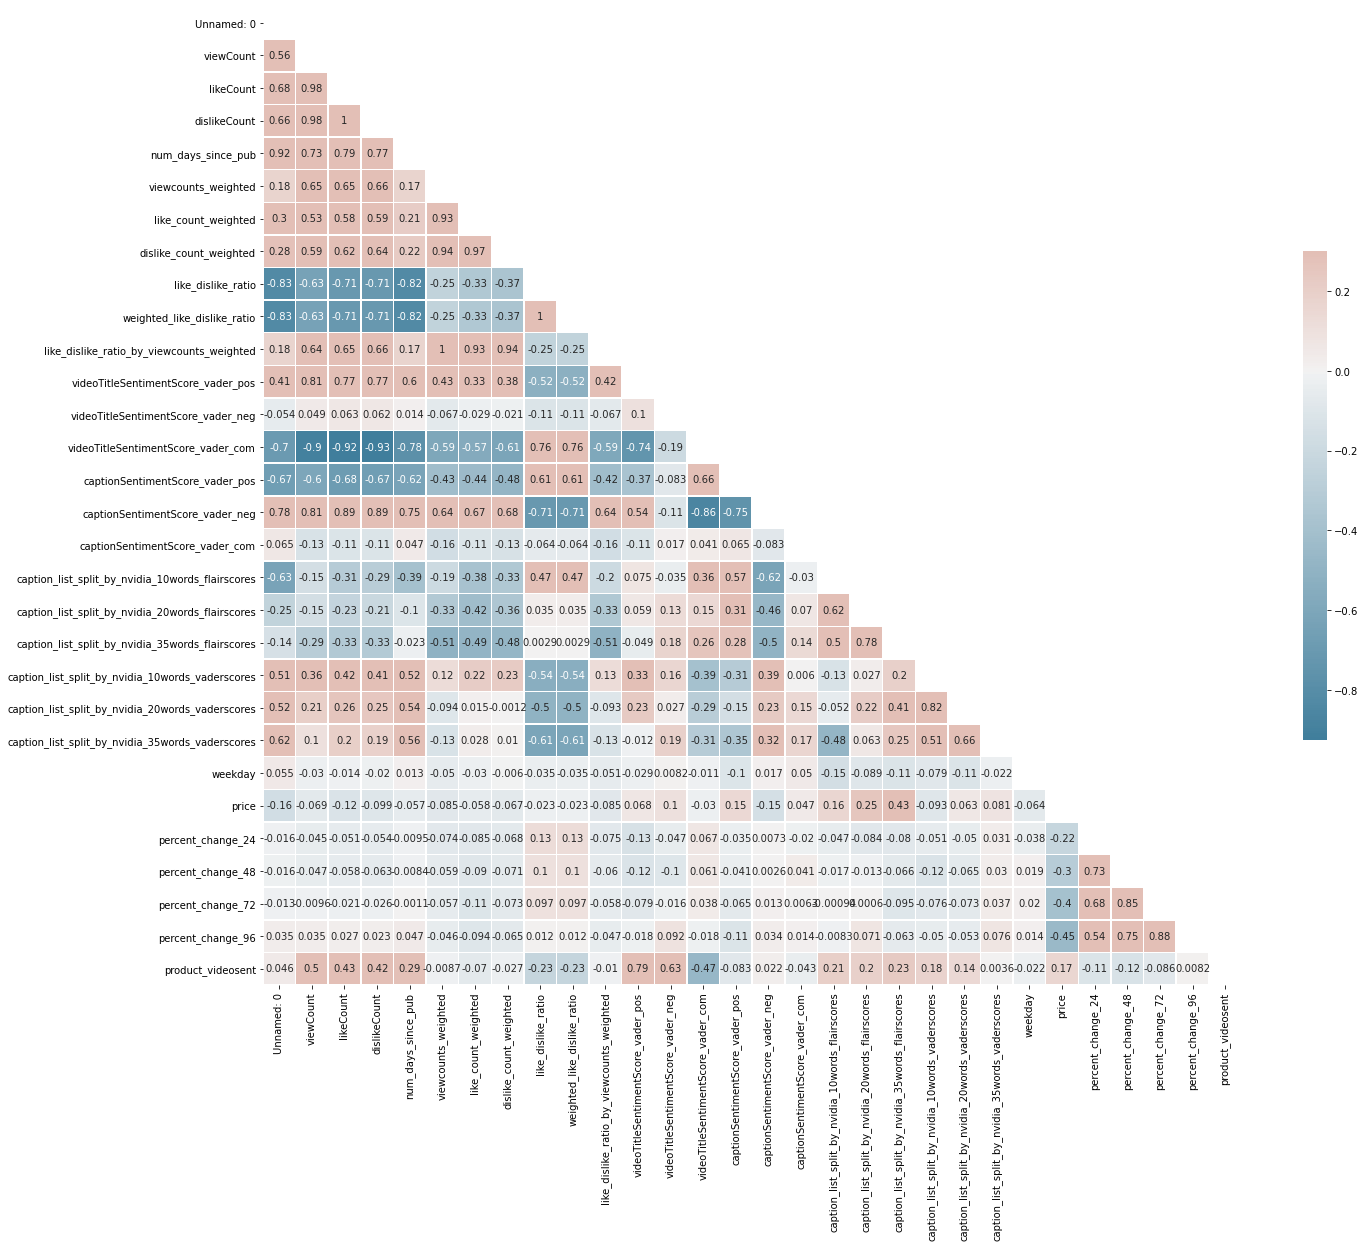

In [51]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    cbar_kws={"shrink": 0.5},
)

In [52]:
hr_merged_df_normal.sample()

,Unnamed: 0,viewCount,likeCount,dislikeCount,num_days_since_pub,viewcounts_weighted,like_count_weighted,dislike_count_weighted,like_dislike_ratio,weighted_like_dislike_ratio,...,caption_list_split_by_nvidia_20words_vaderscores,caption_list_split_by_nvidia_35words_vaderscores,Time,weekday,price,percent_change_24,percent_change_48,percent_change_72,percent_change_96,product_videosent
68,68,0.000183,5.742875e-07,0.000022,0.20849,0.000707,0.000351,0.000497,0.869384,0.869384,...,0.300139,0.460227,2020-10-12,0.0,570.210022,0.319182,-0.755861,-1.794083,-2.881393,NaN


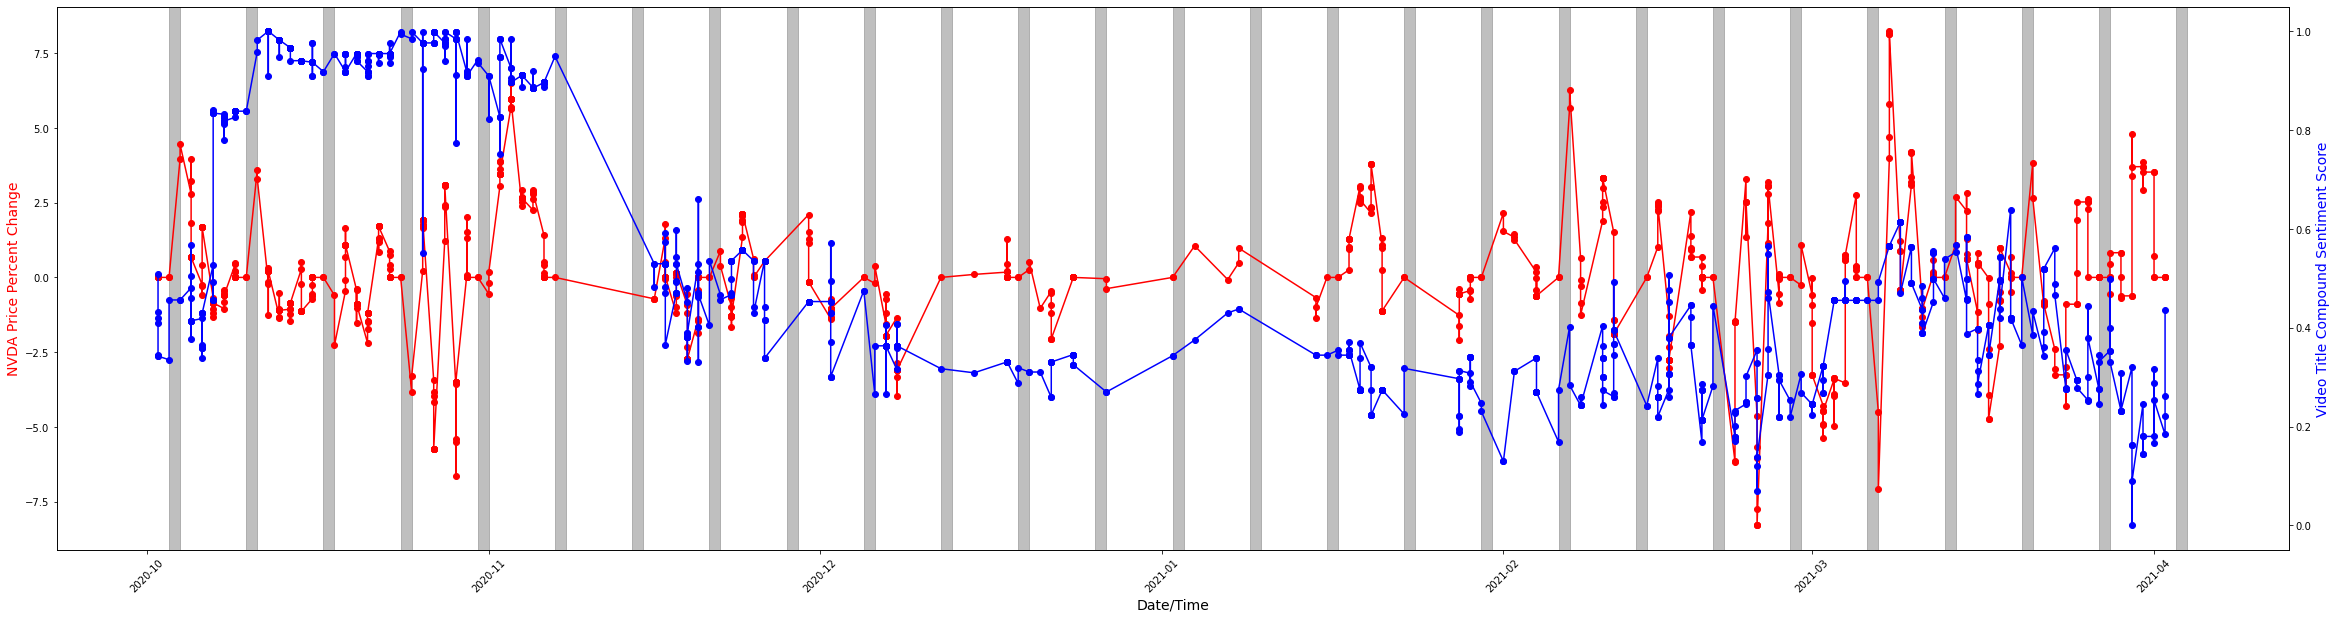

In [54]:
x = pd.DataFrame(hr_merged_df_normal.Time)
# print(full_joined_df["compound"])
y = pd.DataFrame(hr_merged_df_normal["videoTitleSentimentScore_vader_com"])

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(40, 10))
# make a plot

ax.plot(
    hr_merged_df_normal.Time,
    hr_merged_df_normal.percent_change_24,
    color="red",
    marker="o",
)
# set x-axis label
ax.set_xlabel("Date/Time", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change", color="red", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(
    hr_merged_df_normal.Time,
    hr_merged_df_normal["videoTitleSentimentScore_vader_com"],
    color="blue",
    marker="o",
)
ax2.set_ylabel("Video Title Compound Sentiment Score", color="blue", fontsize=14)


def find_weekend_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() >= 5:
            indices.append(i)
    return indices


indices = find_weekend_indices(hr_merged_df_normal.Time)
# print(indices)

sat = hr_merged_df_normal.Time[indices[0]]
sun = hr_merged_df_normal.Time[indices[0]] + timedelta(days=1)
for i in range(
    round(
        int(
            (
                hr_merged_df_normal.Time[indices[-1]]
                - hr_merged_df_normal.Time[indices[0]]
            ).days
        )
        / 7
    )
    + 2
):
    ax.axvspan(sat, sun, alpha=0.5, color="gray")
    sat += timedelta(days=7)
    sun += timedelta(days=7)

plt.show()
# save the plot as a file
fig.savefig(
    "../20_graphics/NVDA_Sentiment_Stock_ComparisonPlot.jpeg",
    format="jpeg",
    dpi=200,
    bbox_inches="tight",
)

In [52]:
#####
# Distrpution Plots
#####

C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  1.,  1.,  6., 15., 30., 87., 56., 86., 53., 45., 76., 35.,
        43., 20.,  7.,  1.,  0.,  1.,  2., 29.,  1., 62., 72., 75.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

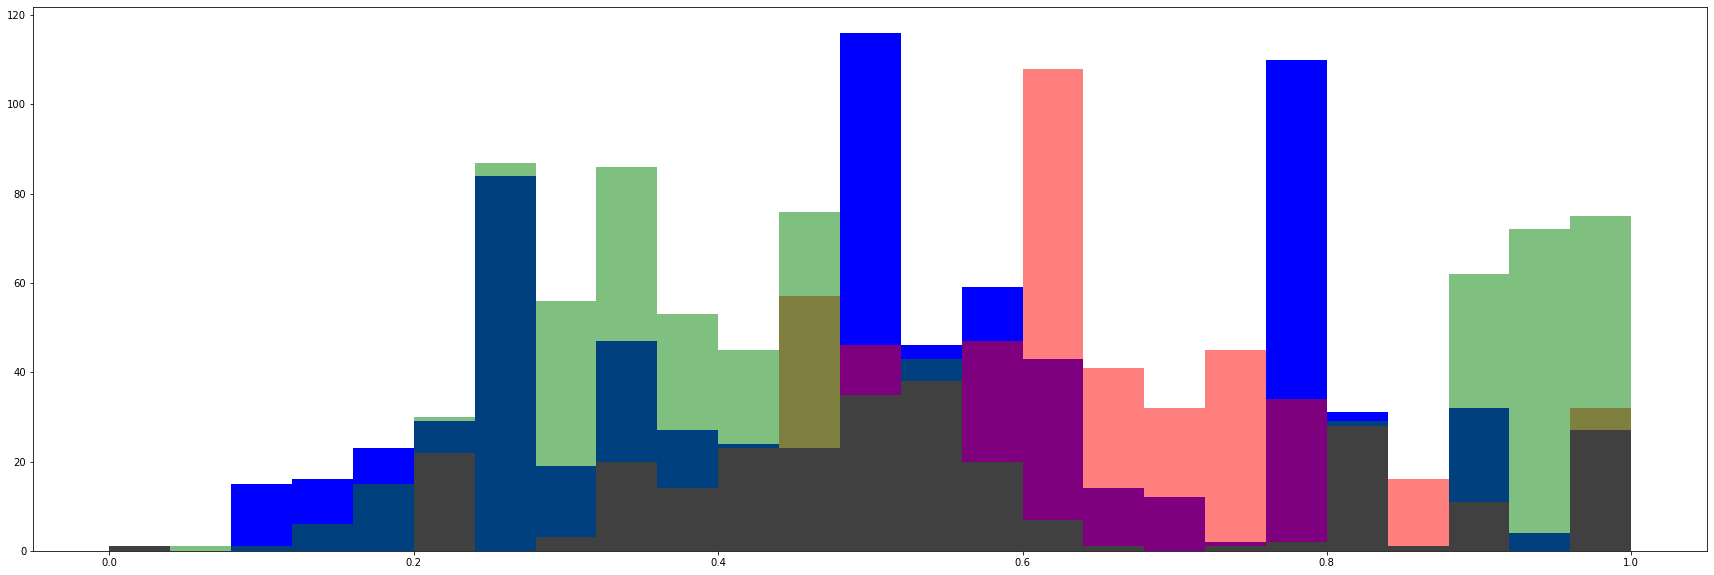

In [58]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_pos"], color="blue", bins=25
)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_neg"],
    color="red",
    alpha=0.5,
    bins=25,
)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_com"],
    color="green",
    alpha=0.5,
    bins=25,
)

TypeError: cannot convert the series to <class 'float'>

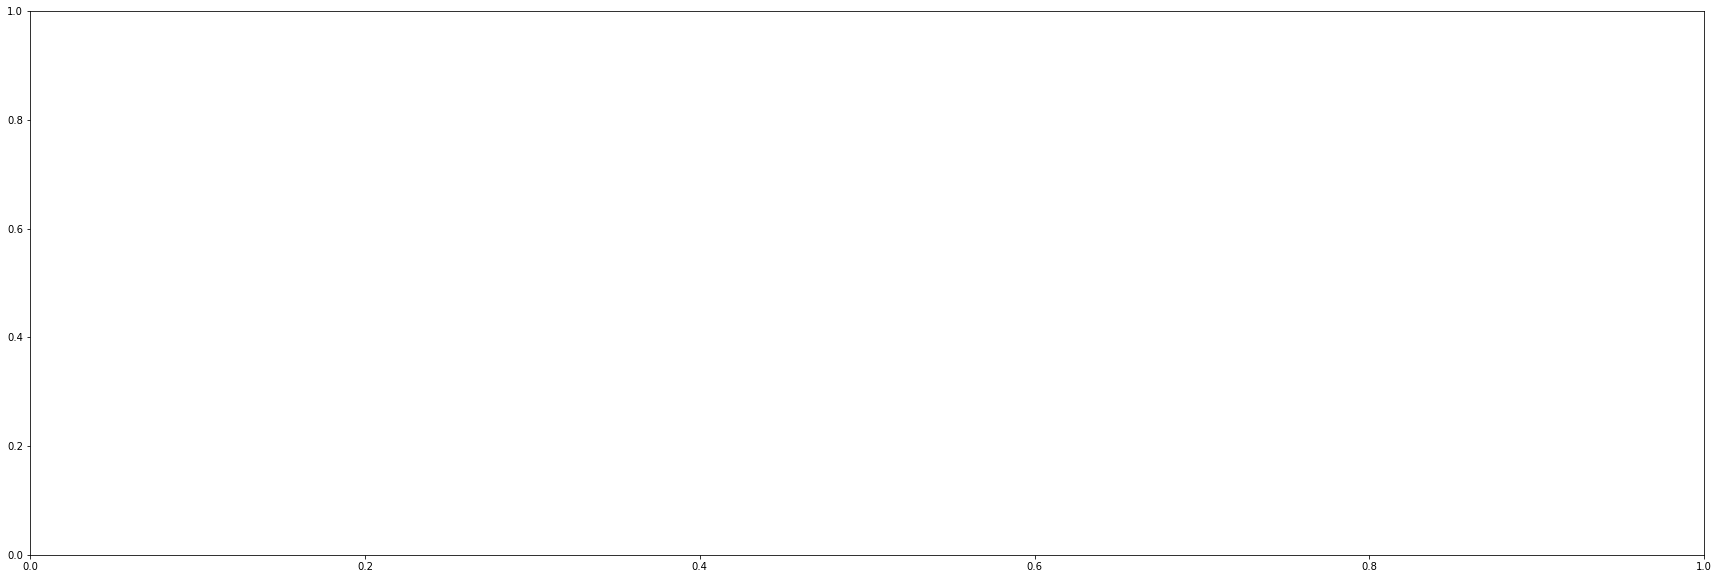

In [101]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.hist(log(hr_merged_df_normal["videoTitleSentimentScore_pos"]), color="blue", bins=25)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_neg"],
    color="red",
    alpha=0.5,
    bins=25,
)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_com"],
    color="green",
    alpha=0.5,
    bins=25,
)

Text(0.5, 1.0, 'Video Title Neg/Pos')

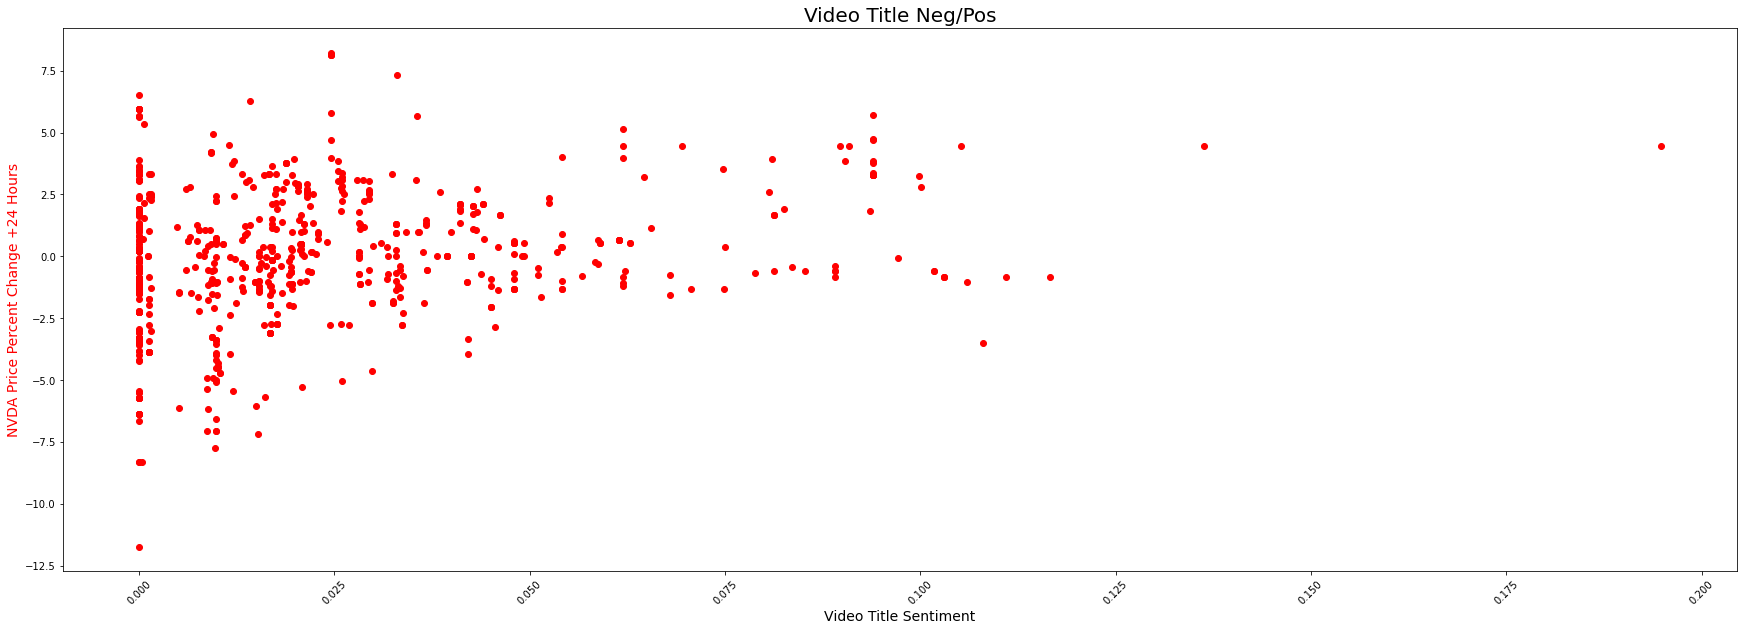

In [67]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.scatter(
    (
        hr_merged_df_normal["videoTitleSentimentScore_pos"]
        * hr_merged_df_normal["videoTitleSentimentScore_neg"]
        * hr_merged_df_normal["videoTitleSentimentScore_com"]
    ),
    hr_merged_df_normal.percent_change,
    color="red",
    marker="o",
)
# set x-axis label
ax.set_xlabel("Video Title Sentiment", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
plt.title("Video Title Neg/Pos", fontsize=20)

Text(0.5, 1.0, 'Video Title Pos Only')

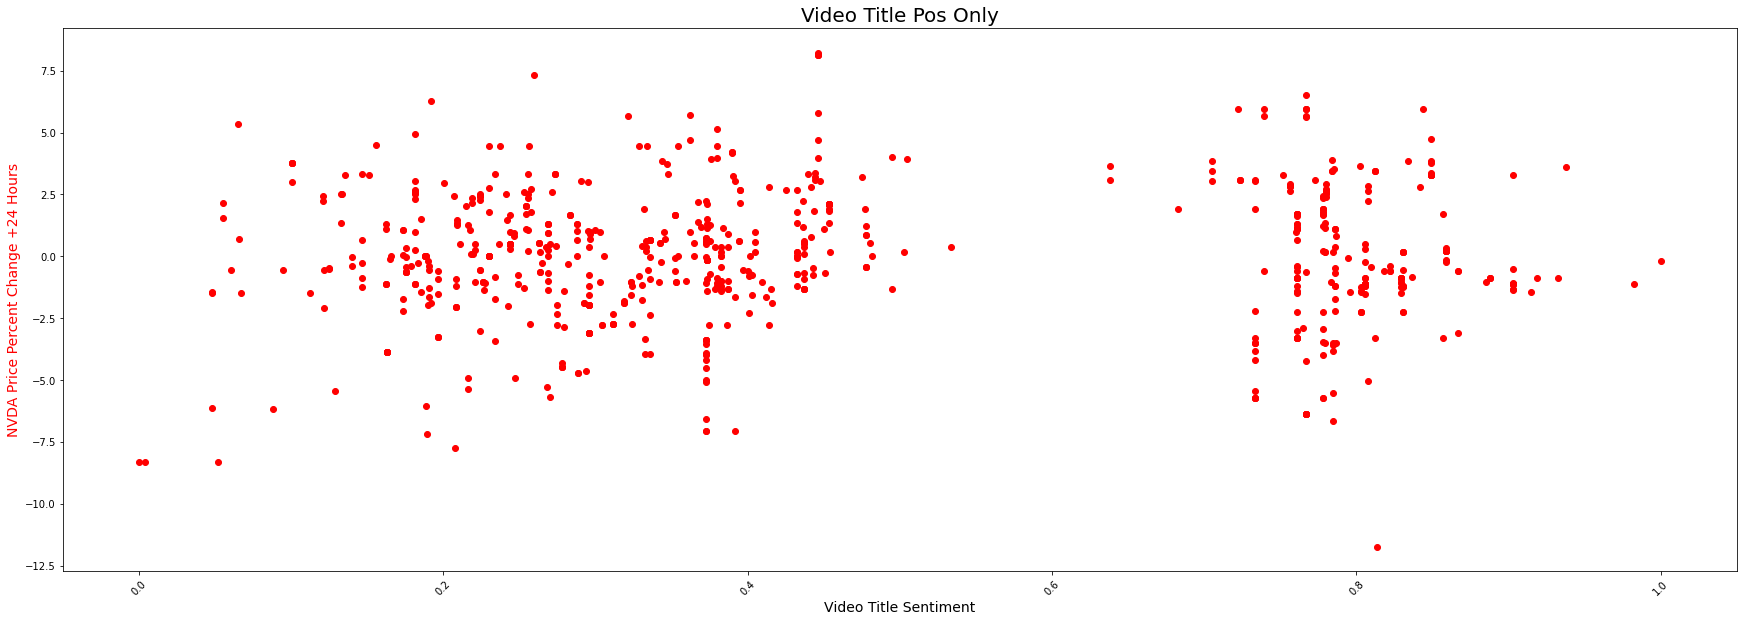

In [66]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.scatter(
    (hr_merged_df_normal["videoTitleSentimentScore_com"]),
    hr_merged_df_normal.percent_change,
    color="red",
    marker="o",
)
# set x-axis label
ax.set_xlabel("Video Title Sentiment", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
plt.title("Video Title Pos Only", fontsize=20)

Text(0.5, 1.0, 'Caption Neg/Pos')

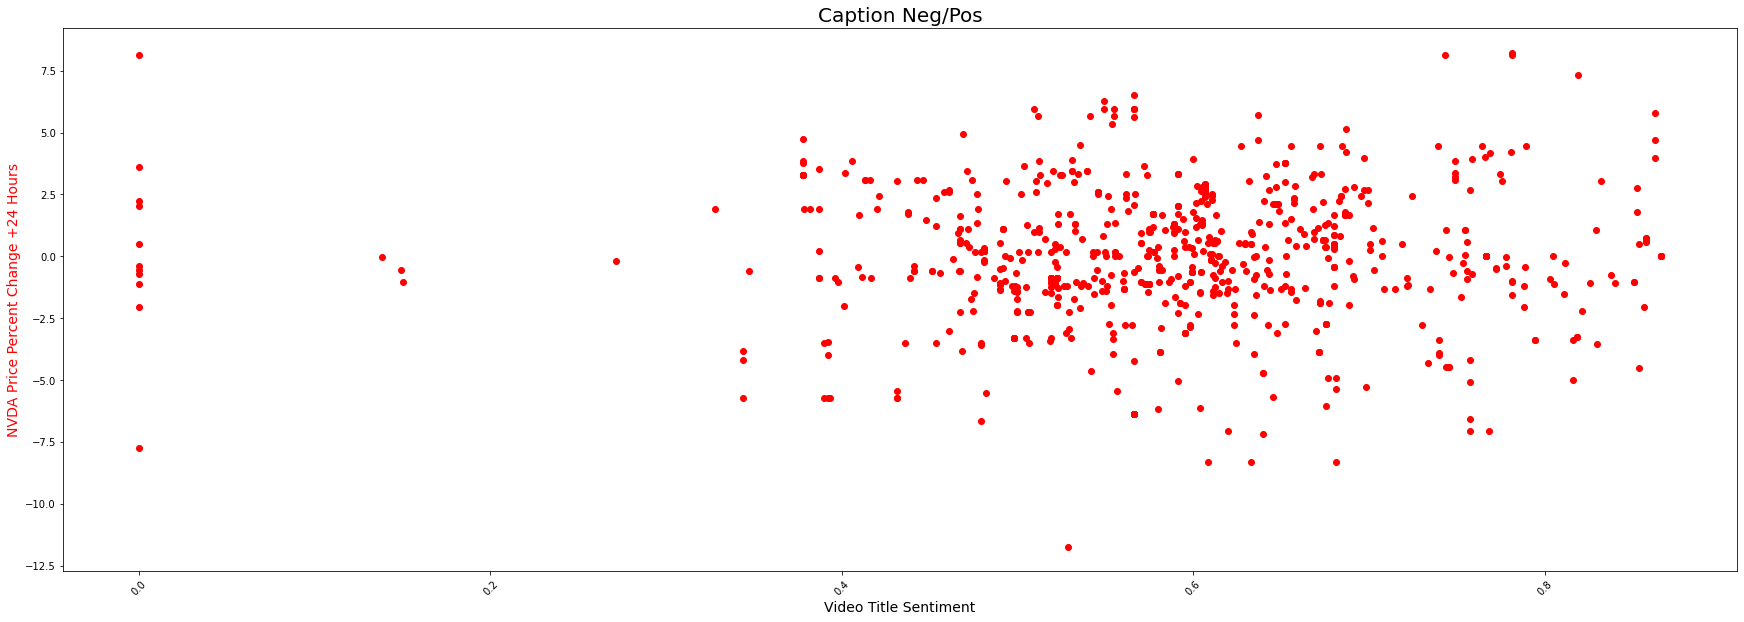

In [42]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.scatter(
    (
        hr_merged_df_normal["captionSentimentScore_neg"]
        * hr_merged_df_normal["captionSentimentScore_pos"]
    ),
    hr_merged_df_normal.percent_change,
    color="red",
    marker="o",
)
# set x-axis label
ax.set_xlabel("Video Title Sentiment", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
plt.title("Caption Neg/Pos", fontsize=20)